In [1]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### 2.1 Picking a machine learning model for a regression problem
Let's use the California Housing dataset -  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
#Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#Import Algorithm/estimator
from sklearn.linear_model import Lasso
#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]#median house price in $100,000s

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the mode (On the training set)
model = Lasso()
model.fit(X_train, y_train)

#Check the score of the model(On the test set)
model.score(X_test, y_test)

0.2841671821008396

What if Ridge didn't work or the score didn't fit our needs?

well, we could always try a different model...

How about we try an ensemble model (an ensemble is comination of smaller models to try and make better prediction than just a simple model

Sklearn's ensemble models can be found here https://scikit-learn.org/stable/modules/ensemble.html

In [6]:
#Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]#median house price in $100,000s

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model(On the test set)
model.score(X_test, y_test)

0.8065734772187598

### 2.1 Picking a machine learning model for Classification problem

Let's use heart-Disease dataset which is in our local files.

In [7]:
#1.Getting data ready
heart_disease= pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`.

In [8]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=10000000)
clf.fit(X_train, y_train)

#Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [9]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Tidbit:
   1. If You have structured data, use ensemble methods
   2. If you have unstructured data, use deep learning or transfer learning

In [10]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [11]:
#Import the SVC estimator class
from sklearn import svm

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf = svm.SVC()
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.7049180327868853

## 3. Fit the model/algorithm on our data and use it  to make predictions

### 3.1 Fitting the model to the data

* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [12]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10)

#fit the model to the data(Training machine learning model)
clf.fit(X_train, y_train)

#Evaluate the Random Forest Classifier(Use the Patterns the model has)
clf.score(X_test, y_test)

0.8524590163934426

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make Predictions using a machine learning model

2 ways to make predictions:

 1. `predict()`
 2. `predict_proba()`

In [15]:
# Use a Trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) #this doesn't work

C:\Users\Manishankar04\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [17]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [20]:
clf.score(X_test, y_test)

0.8524590163934426

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make Predictions with `predict_proba()`

In [22]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:10])

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.2, 0.8],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7]])

In [23]:
#let's predict () on the same data
clf.predict(X_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [25]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models.

In [26]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
X = housing_df.drop("MedHouseVal", axis =1)
y = housing_df["MedHouseVal"]

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create model instances
model = RandomForestRegressor()

#Fit the model to the data
model.fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)

In [28]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [29]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [30]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [31]:
len(y_test)

4128

In [32]:
housing_df["MedHouseVal"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

   1. Estimators built-in `score()` method
   2. The `Scoring` parameter
   3. Problem-specific metric functions

You can read more about these here :https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with `score` method

In [33]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10)

#fit the model to the data(Training machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [34]:
#The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [35]:
clf.score(X_test, y_test)

0.8524590163934426

let's use the `score()` on our regression problem

In [36]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Regression
clf = RandomForestRegressor(n_estimators=50)

#fit the model to the data(Training machine learning model)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [37]:
#The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

0.9178098089259847

In [38]:
clf.score(X_test, y_test)

0.5483896551724138

In [39]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4.1 Evaluating a model with `score` passthrough

In [40]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Random Forest Regression
clf = RandomForestRegressor(n_estimators=50)

#fit the model to the data(Training machine learning model)
clf.fit(X_train, y_train);


In [41]:
clf.score(X_test, y_test)

0.5483896551724138

In [42]:
cross_val_score(clf, X, y,cv=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.39588889, 0.        , 0.        , 0.        , 0.        ])

In [43]:
np.random.seed(42)

#single Training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare both the score
clf_single_score, clf_cross_val_score

(0.5483896551724138, 0.06726273901808791)

In [44]:
#Scoring paramater set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.        , 0.        , 0.32017313, 0.        , 0.        ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [46]:
np.mean(cross_val_score)

0.8248087431693989

In [47]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC Curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [48]:
#Create X_test .... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] , len(y_probs)

(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [51]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [55]:
#calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

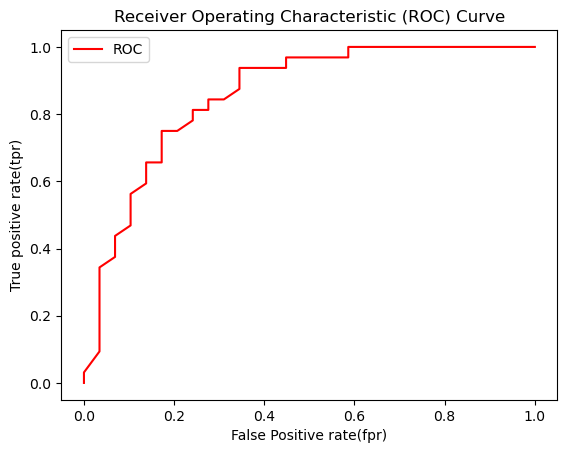

In [58]:
#create a function for plotting ROC curves
def plot_roc_curve(fpr,tpr):
    """
    plots a ROC Curve Given the false positive rate(fpr) 
    and true positive rate(tpr) of a model.
    """
    
    #plot roc curve
    plt.plot(fpr,tpr, color="red", label="ROC")
    #plot lne with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False Positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr) 

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

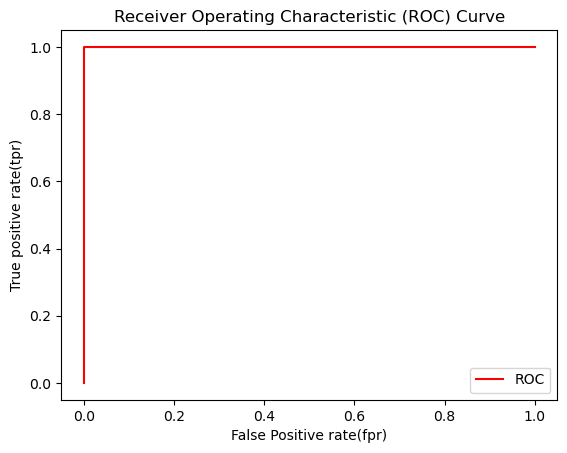

In [61]:
#plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [62]:
#perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [65]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [67]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,8,24


In [68]:
24+24+8+5

61

In [70]:
len(y_preds)

61

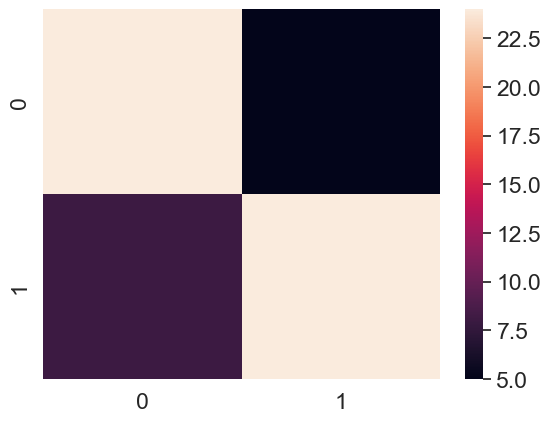

In [72]:
# Make our confusion matrix more visual with seaborn heatmap
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

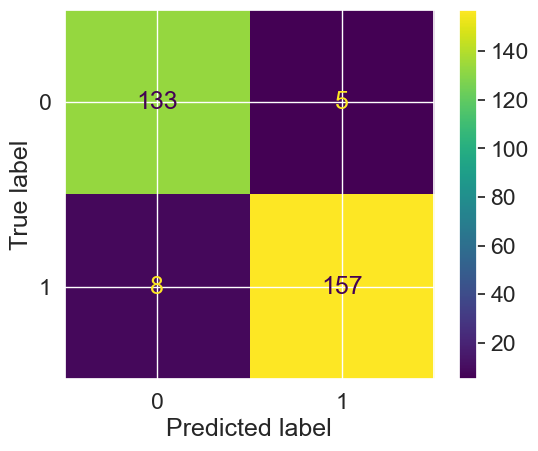

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

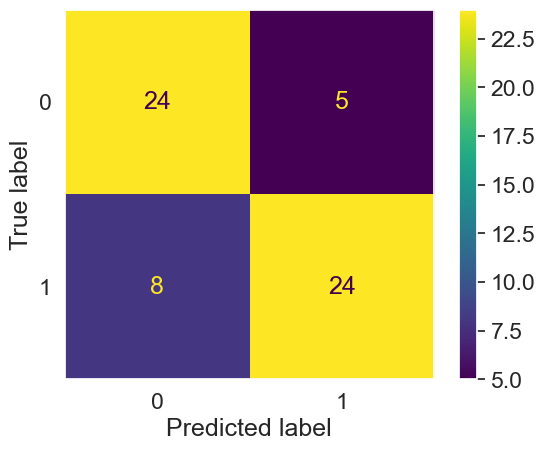

In [84]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);
plt.grid(False);

#### Classification Report 

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [86]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds =  np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Manishankar04\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manishankar04\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manishankar04\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
